In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#from __future__ import print_function

import os
import sys
import matplotlib.pyplot as plt

from keras.applications.imagenet_utils import preprocess_input
from keras.models import load_model

sys.path.append('..')
from utils import display_examples, RotNetDataGenerator, angle_error
from data.men_standing_dataset import get_filenames

Using TensorFlow backend.


## Load file names

In [11]:
import glob
men_standing_dir = os.path.join('..', 'data', 'men_standing')

if os.path.exists(men_standing_dir):
    test_filenames = get_filenames(men_standing_dir)[1]
else:
#     test_examples_path = os.path.join('..', 'data', 'test_examples_indian_celeb')
    test_examples_path = os.path.join('..', 'data', 'body_zoomed_test_examples_indian_celeb')
    test_filenames = glob.glob(test_examples_path+"/*jpg")
    for file in test_filenames:
        print(file)

../data/body_zoomed_test_examples_indian_celeb/amir.jpg
../data/body_zoomed_test_examples_indian_celeb/tiger.jpg
../data/body_zoomed_test_examples_indian_celeb/kiara.jpg


## Load model

In [12]:
model_location = os.path.join('..', 'models', 'weights.43-0.03.hdf5')
model = load_model(model_location, custom_objects={'angle_error': angle_error})

In [13]:
from keras.optimizers import SGD
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, momentum=0.9),
              metrics=[angle_error])

## Evaluate model

In [14]:
batch_size = 64
out = model.evaluate_generator(
    RotNetDataGenerator(
        test_filenames,
        input_shape=(224, 224, 3),
        batch_size=batch_size,
        preprocess_func=preprocess_input,
        crop_center=True,
        crop_largest_rect=True,
        shuffle=True
    ),
    steps=len(test_filenames) / batch_size
)

print('Test loss:', out[0])
print('Test angle error:', out[1])

Test loss: 5.445310592651367
Test angle error: 14.333333015441895


## Display examples

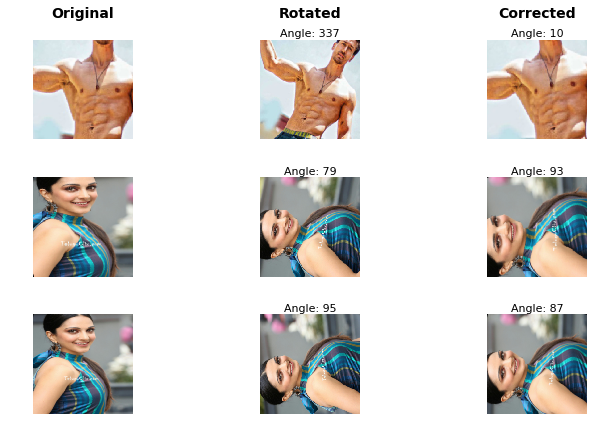

In [15]:
num_images = len(test_filenames)

display_examples(
    model, 
    test_filenames,
    num_images=num_images,
    size=(224, 224),
    crop_center=True,
    crop_largest_rect=True,
    preprocess_func=preprocess_input,
)